# Dataset Description

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019. This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('data-set/AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df_col = df.columns
df_col

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
null_col = []
for col in df_col:
    null_col.append(df[col].isnull().values.sum())
    
print(null_col)

[0, 16, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 10052, 10052, 0, 0]


In [6]:
mean = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean, inplace=True)

In [7]:
df['name'] = df['reviews_per_month'].fillna('none')
df['host_name'] = df['reviews_per_month'].fillna('none')
df['last_review'] = df['reviews_per_month'].fillna('none')

In [8]:
sum_host = df.host_id.value_counts()
top_15_df = pd.DataFrame(sum_host.head(15))
top_15_df.reset_index(inplace=True)
top_15_df.rename(columns={'index':'host_id', 'host_id':'count'}, inplace=True)
top_15_df

,host_id,count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


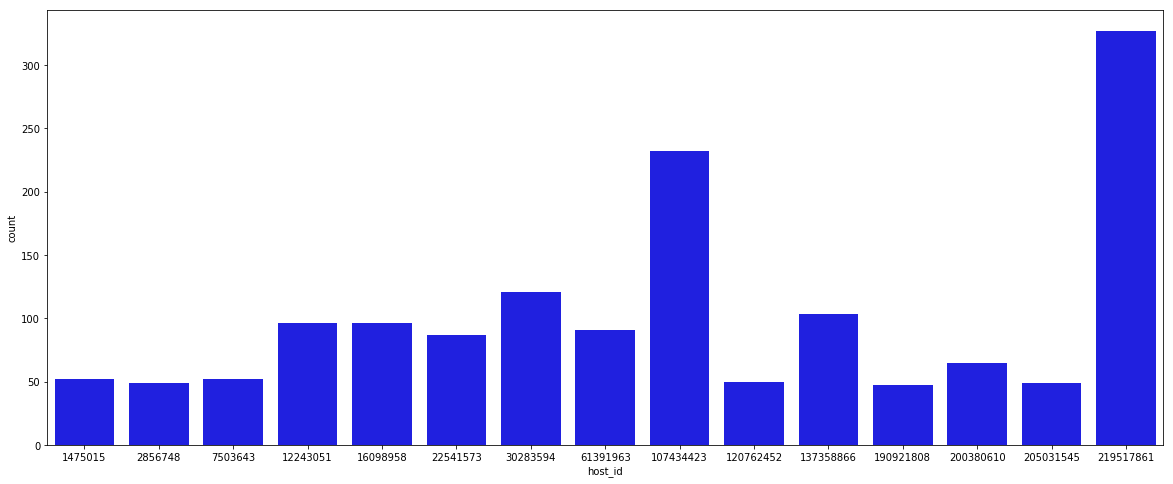

In [9]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x="host_id", y="count", data=top_15_df,color='b')

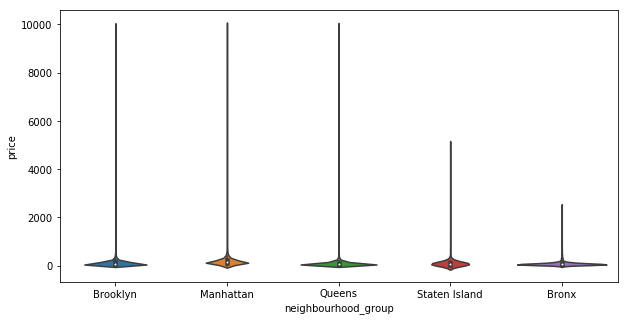

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
sns.violinplot(x="neighbourhood_group", y="price", data=df)

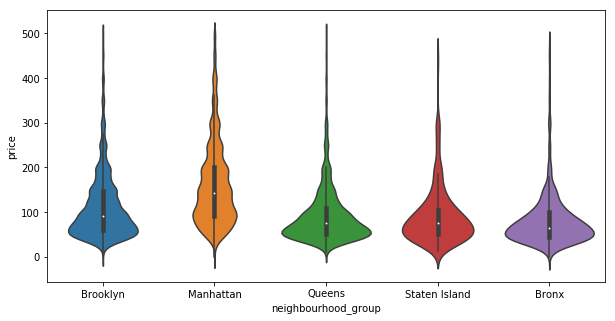

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
adjusted_price = df.loc[df.price<500]
sns.violinplot(x="neighbourhood_group", y="price", data=adjusted_price)

In [12]:
borough = df.neighbourhood_group.unique()
borough

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [13]:
price_list = []

brooklyn_df = df.loc[df['neighbourhood_group'] == 'Brooklyn']
row, col = brooklyn_df.shape
brooklyn_price_df = brooklyn_df.price.sum()/row
price_list.append(brooklyn_price_df)

manhattan_df = df.loc[df['neighbourhood_group'] == 'Manhattan']
row, col = manhattan_df.shape
manhattan_price_df = manhattan_df.price.sum()/row
price_list.append(manhattan_price_df)

queens_df = df.loc[df['neighbourhood_group'] == 'Queens']
row, col = queens_df.shape
queens_price_df = queens_df.price.sum()/row
price_list.append(queens_price_df)

si_df = df.loc[df['neighbourhood_group'] == 'Staten Island']
row, col = si_df.shape
si_price_df = si_df.price.sum()/row
price_list.append(si_price_df)

bronx_df = df.loc[df['neighbourhood_group'] == 'Bronx']
row, col = bronx_df.shape
bronx_price_df = bronx_df.price.sum()/row
price_list.append(bronx_price_df)

Text(0.5,1,'Average Prices Amongst the Bouroughs')

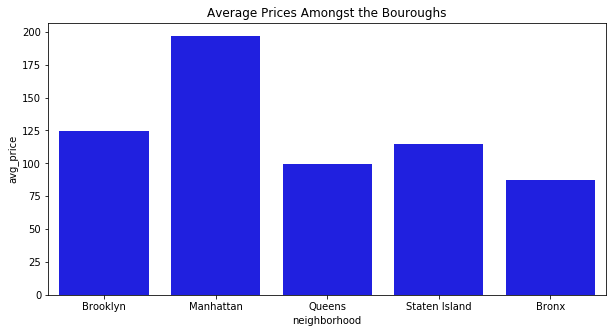

In [14]:
data = {'neighborhood':borough,'avg_price':price_list}
price_df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x="neighborhood", y="avg_price", data=price_df,color='b')
ax.set_title('Average Prices Amongst the Bouroughs')

In [15]:
# px.bar(price_df, x='neighborhood', y='avg_price',height=500)

Text(0.5,1,'All Prices Listed for all the Bouroughs')

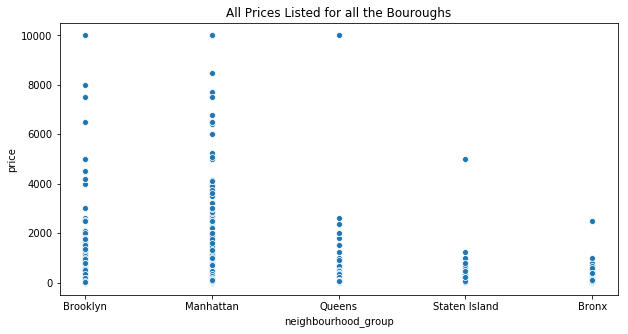

In [16]:
# px.scatter(df, x="neighbourhood_group", y="price")
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=df, x="neighbourhood_group", y="price")
ax.set_title('All Prices Listed for all the Bouroughs')

In [17]:
room_type = df.room_type.unique()
room_type

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Text(0.5,1,'Brooklyn Room Type Count')

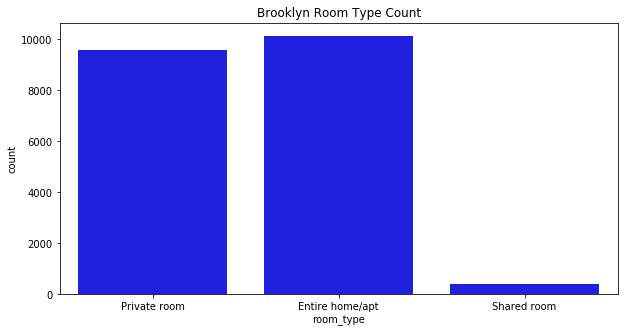

In [18]:
room_list = []
room_type_df = df.loc[df['neighbourhood_group']=='Brooklyn']
room_type_df = room_type_df.groupby('room_type')['id'].nunique()

for i in range(len(room_type_df)):
    room_list.append(room_type_df[i])
    
d = {'room_type': room_type, 'count': room_list}
room_df = pd.DataFrame(d)
# px.bar(room_df, x='room_type', y='count',height=500,title="Brooklyn Room Type Count")
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x='room_type', y='count', data=room_df,color='b')
ax.set_title('Brooklyn Room Type Count')

Text(0.5,1,'Manhattan Room Type Count')

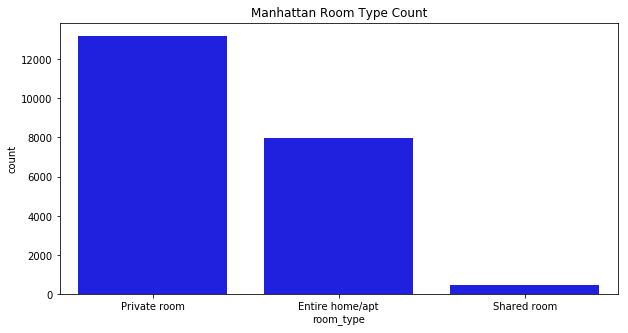

In [19]:
room_list = []
room_type_df = df.loc[df['neighbourhood_group']=='Manhattan']
room_type_df = room_type_df.groupby('room_type')['id'].nunique()

for i in range(len(room_type_df)):
    room_list.append(room_type_df[i])
    
d = {'room_type': room_type, 'count': room_list}
room_df = pd.DataFrame(d)
# px.bar(room_df, x='room_type', y='count',height=500,title="Manhattan Room Type Count")
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x='room_type', y='count', data=room_df,color='b')
ax.set_title('Manhattan Room Type Count')

Text(0.5,1,'Queens Room Type Count')

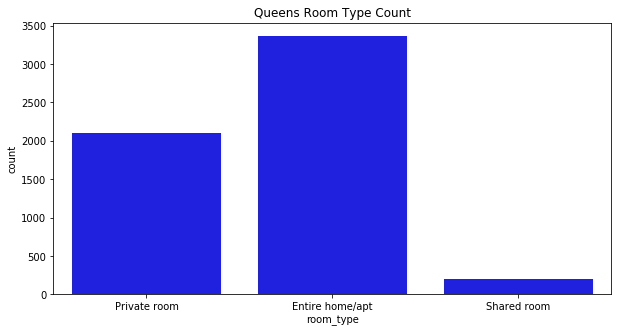

In [20]:
room_list = []
room_type_df = df.loc[df['neighbourhood_group']=='Queens']
room_type_df = room_type_df.groupby('room_type')['id'].nunique()

for i in range(len(room_type_df)):
    room_list.append(room_type_df[i])
    
d = {'room_type': room_type, 'count': room_list}
room_df = pd.DataFrame(d)
# px.bar(room_df, x='room_type', y='count',height=500,title="Queens Room Type Count")
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x='room_type', y='count', data=room_df,color='b')
ax.set_title('Queens Room Type Count')

Text(0.5,1,'Staten Island Room Room Type Count')

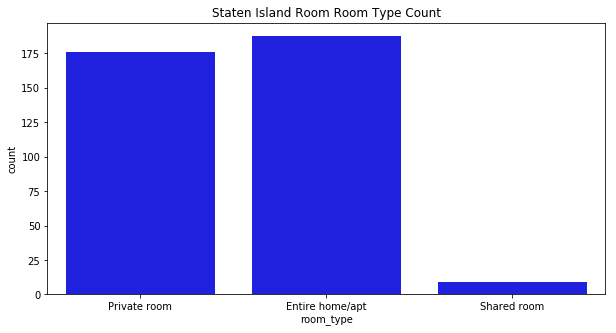

In [21]:
room_list = []
room_type_df = df.loc[df['neighbourhood_group']=='Staten Island']
room_type_df = room_type_df.groupby('room_type')['id'].nunique()

for i in range(len(room_type_df)):
    room_list.append(room_type_df[i])
    
d = {'room_type': room_type, 'count': room_list}
room_df = pd.DataFrame(d)
# px.bar(room_df, x='room_type', y='count',height=500,title="Staten Island Room Type Count")
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x='room_type', y='count', data=room_df,color='b')
ax.set_title('Staten Island Room Room Type Count')

Text(0.5,1,'Bronx Room Room Type Count')

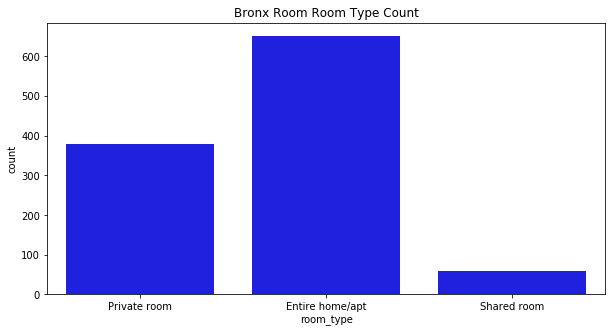

In [22]:
room_list = []
room_type_df = df.loc[df['neighbourhood_group']=='Bronx']
room_type_df = room_type_df.groupby('room_type')['id'].nunique()

for i in range(len(room_type_df)):
    room_list.append(room_type_df[i])
    
d = {'room_type': room_type, 'count': room_list}
room_df = pd.DataFrame(d)
# px.bar(room_df, x='room_type', y='count',height=500,title="Bronx Room Type Count")
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x='room_type', y='count', data=room_df,color='b')
ax.set_title('Bronx Room Room Type Count')

Text(0.5,1,'All Boroughs Room Type Count')

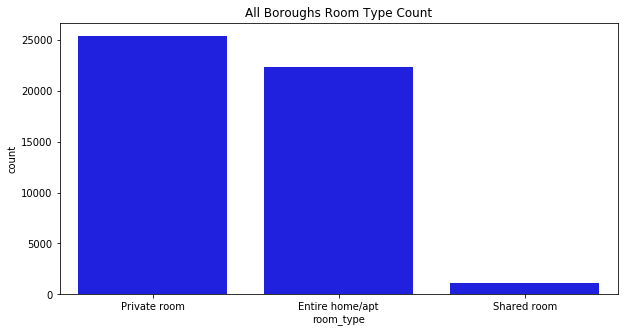

In [23]:
room_list = []
room_type_df = df.groupby('room_type')['id'].nunique()

for i in range(len(room_type_df)):
    room_list.append(room_type_df[i])
    
d = {'room_type': room_type, 'count': room_list}
room_df = pd.DataFrame(d)
# px.bar(room_df, x='room_type', y='count',height=500,title="All Boroughs Room Type Count")
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x='room_type', y='count', data=room_df,color='b')
ax.set_title('All Boroughs Room Type Count')

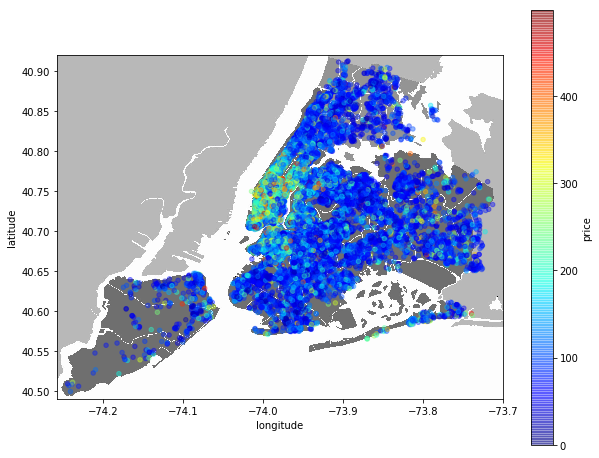

In [24]:
bnb_price=df[df.price < 500]

img = plt.imread("./data-set/New_York_City_.png",0)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

bnb_price.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

# Price Prediction using Regression Model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

By plotting the correlation matrix we are able to visualize the correlations between each two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

There are three broad reasons for computing a correlation matrix:

1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.

2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.

3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

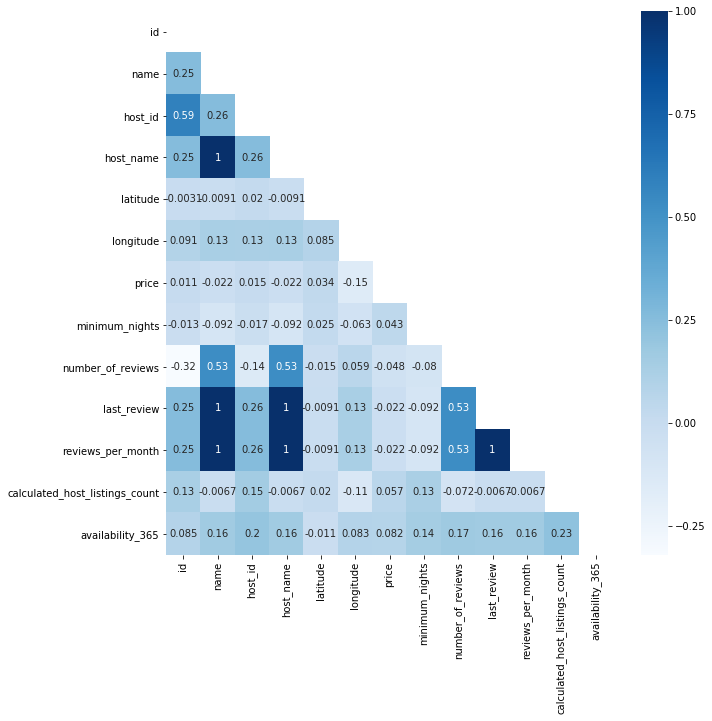

In [26]:
fig, ax = plt.subplots(figsize=(10,10))

corr_mat = df.corr(method='pearson')
matrix = np.triu(corr_mat.values)#return the lower half of the matrix
sns.heatmap(corr_mat, annot = True, cmap='Blues',mask=matrix)

When plotting the distribution based on all the listed prices, we notice a right skew or positive skew of data. Normally, we would want a normal distribution in a form of a bellcurve. This allows us to assume that the mean of this bellcurve will be the most frequent reoccuring data. 

Methods to transform a positive skew is to either perform square root, cube root, or log onto the skewed data. In our case, we will be preforming the log of the price with an addition of 1 to avoid the possibility of a zeros error.

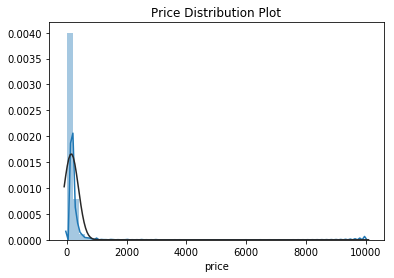

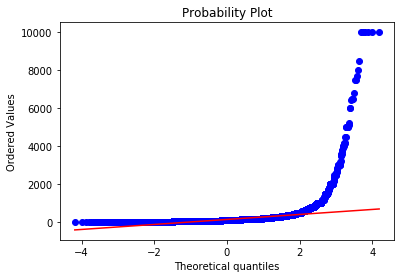

In [27]:
from scipy import stats

#histogram and normal probability plot
sns.distplot(df['price'], fit=stats.norm);
plt.title("Price Distribution Plot")
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

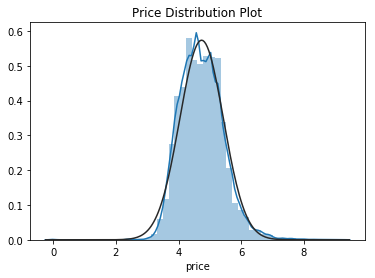

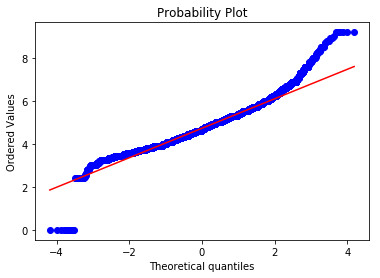

In [28]:
df['price'] = np.log(df['price']+1)

sns.distplot(df['price'], fit=stats.norm);
plt.title("Price Distribution Plot")
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

Before we begin we would have to preprocess our data and drop columns that does not factor into the regression model predictions. We split our data into x and y where y_data is our target value and the x_data is features that will help determine our target value.

Next, we would have to encode strings into a numerical and perfrom a preprocessing method on the X_data to allow our data to be more readable when training our models. We decided to go with StandardScaler to preprocess our data.

By splitting our data into training and testing sets, we will be training the trainin set with our models and perform predictions onto our
we are able to see how accurate our model is when predicting onto the testing set.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x = df
y = df.price
x = x.drop(columns=['name','id' ,'host_id','host_name', 
                                   'last_review','price'])

In [30]:
le = preprocessing.LabelEncoder()
encoded1 = le.fit_transform(x['neighbourhood_group'])
encoded2 = le.fit_transform(x['neighbourhood'])
encoded3 = le.fit_transform(x['room_type'])

In [31]:
x['neighbourhood_group'] = encoded1
x['neighbourhood'] = encoded2
x['room_type'] = encoded3

In [32]:
# Standardization
sc = preprocessing.StandardScaler()
x = sc.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Mean Absolute Error (MAE) shows the difference between predictions and actual values.

Root Mean Square Error (RMSE) shows how accurately the model predicts the response.

R^2 will be calculated to find the goodness of fit measure.

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

ridge_model = Ridge()
ridge_model.fit(X_train,y_train)

lasso_model = Lasso()
lasso_model.fit(X_train,y_train)

elastic_model = ElasticNet()
elastic_model.fit(X_train,y_train)

# Testing
y_test_pred_lr = lr_model.predict(X_test)
y_test_pred_ridge = ridge_model.predict(X_test)
y_test_pred_lasso = lasso_model.predict(X_test)
y_test_pred_elastic = elastic_model.predict(X_test)

In [35]:
print('Linear Regression')
print('MAE validation: ', mean_absolute_error(y_test, y_test_pred_lr))
print('RMSE validation: ', np.sqrt(mean_squared_error(y_test, y_test_pred_lr)))
print('R^2 validation: ',r2_score(y_test, y_test_pred_lr))
print('--------------------------------------------------------------------')
print('Ridge')
print('MAE validation: ', mean_absolute_error(y_test, y_test_pred_ridge))
print('RMSE validation: ', np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)))
print('R^2 validation: ',r2_score(y_test, y_test_pred_ridge))
print('--------------------------------------------------------------------')
print('Lasso')
print('MAE validation: ', mean_absolute_error(y_test, y_test_pred_lasso))
print('RMSE validation: ', np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)))
print('R^2 validation: ',r2_score(y_test, y_test_pred_lasso))
print('--------------------------------------------------------------------')
print('ElasticNet')
print('MAE validation: ', mean_absolute_error(y_test, y_test_pred_elastic))
print('RMSE validation: ', np.sqrt(mean_squared_error(y_test, y_test_pred_elastic)))
print('R^2 validation: ',r2_score(y_test, y_test_pred_elastic))

Linear Regression
MAE validation:  0.36760313258111166
RMSE validation:  0.5046688958014126
R^2 validation:  0.46111703555126327
--------------------------------------------------------------------
Ridge
MAE validation:  0.3676030441982529
RMSE validation:  0.5046688976265385
R^2 validation:  0.4611170316535421
--------------------------------------------------------------------
Lasso
MAE validation:  0.5460789000214362
RMSE validation:  0.6875092340959891
R^2 validation:  -8.853466442237945e-05
--------------------------------------------------------------------
ElasticNet
MAE validation:  0.5460789000214362
RMSE validation:  0.6875092340959891
R^2 validation:  -8.853466442237945e-05


The MAE value of 0 indicates no error on the model. In other words, there is a perfect prediction.

RMSE gives an idea of how much error the system typically makes in its predictions. The above results show that all models with each phase have significant errors.

R2 represents the proportion of the variance for a dependent variable that's explained by an independent variable.